In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors
from sklearn.neighbors import DistanceMetric

In [2]:
def load_data(datafile):
    data = np.genfromtxt(datafile)
    X = []
    Y = []
    for row in data:
        X.append(row[:-1])
        Y.append(row[-1])
    X = np.array(X)
    Y = np.array(Y)
    return X,Y, data

X, Y, _ = load_data('D2z.txt')

In [47]:
X_test = []
for i in np.arange(-2,2,0.2):
    for j in np.arange(-2,2,0.2):
        X_test.append([i,j])
        
X_test = np.array(X_test)

In [48]:
# dist = DistanceMetric.get_metric('euclidean')
clf = neighbors.KNeighborsClassifier(n_neighbors=1, metric='euclidean')
clf.fit(X,Y)
test_labels = clf.predict(X_test)

In [62]:
# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'skyblue'])
cmap_bold = ListedColormap(['red', 'c', 'blue'])

xx,yy = np.meshgrid(np.arange(-3,3,0.2), np.arange(-3,3,0.2))
xx_labels = clf.predict(np.c_[xx.ravel(), yy.ravel()])
xx_labels = xx_labels.reshape(xx.shape)
test_labels = clf.predict(X_test)

from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='red', edgecolor='k', label='TestSet-0'),
                  Patch(facecolor='white', edgecolor='k', label='TrainSet-0'),
                  Patch(facecolor='blue', edgecolor='k', label='TestSet-1'),
                  Patch(facecolor='k', edgecolor='k', label='TrainSet-1')]

<Figure size 576x396 with 0 Axes>

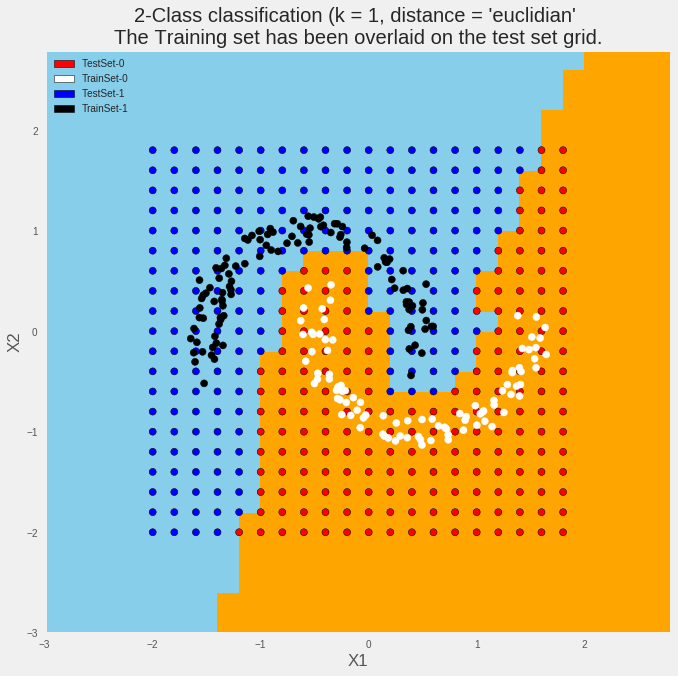

In [70]:
plt.style.use('fivethirtyeight')
fig = plt.figure()

plt.figure(figsize=(10,10))
plt.pcolormesh(xx, yy, xx_labels, cmap=cmap_light)
color_legend = {0:'yellow', 1:'green'}
# Plot also the training points
plt.scatter(X_test[:, 0], X_test[:, 1], c=test_labels.ravel(), cmap=cmap_bold, edgecolor='k')
plt.scatter(X[:,0], X[:,1], c = Y)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("2-Class classification (k = %i, distance = '%s' \nThe Training set has been overlaid on the test set grid."
          % (1, 'euclidian'))
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend(handles=legend_elements, loc=2)
plt.show()

In [99]:
from sklearn.model_selection import cross_val_score
import math

In [188]:
X, Y, data = load_data('D2a.txt')
df = pd.DataFrame(data, columns=['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'y'])
attributes = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6']

In [193]:
X, Y, data = load_data('D2b.txt')
df = pd.DataFrame(data, columns=['x1', 'x2', 'y'])
attributes = ['x1', 'x2']

In [138]:
X_bad = X[:,:-2]
X_good = X[:,-2:]

# Implementation

In [100]:
def knn_predict(train, train_label, test):
    preds = [0 for _ in range(len(test))]
    for i, datapoint1 in enumerate(test):
        min_label = 0
        min_dist = float("inf")
        for j, datapoint2 in enumerate(train):
            diff_vector = datapoint1 - datapoint2
            distance = math.sqrt(np.dot(diff_vector, diff_vector))
            if distance <= min_dist:
                min_dist = distance
                min_label = train_label[j]
                
        preds[i] = min_label
        
    return preds
                    

In [195]:
def cross_validate(X,Y, mode='not',folds=5):
    err = [0 for _ in range(folds)]
    fold_size = X.shape[0] // folds
    for i in range(folds):
        fold_index_start = i*fold_size
        fold_index_end = (i+1)*fold_size
        train = np.array(list(X)[:fold_index_start] + list(X)[fold_index_end:])
        train_label = np.array(list(Y)[:fold_index_start] + list(Y)[fold_index_end:])
        test = np.array(list(X)[fold_index_start:fold_index_end])
        test_label = np.array(list(Y)[fold_index_start:fold_index_end])
        
        if mode == 'norm':
            train = (1/np.std(train, axis=0))*train
            test = (1/np.std(train, axis=0))*test
        
        fold_preds = knn_predict(train, train_label, test)
        fold_error = abs(fold_preds - test_label)
        err[i] = np.mean(fold_error)
        
    return err, np.mean(err)
        
        
cross_validate(X,Y, 'norm')      
        

([0.225, 0.1, 0.125, 0.15, 0.225], 0.16499999999999998)

In [98]:
X_t = np.array(list(X)[:40] + list(X)[80:])
X_test = np.array(list(X)[40:80])

X_t = (1/np.std(X_t, axis=0))*X_t
X_test = (1/np.std(X_t, axis=0))*X_test

np.std(X_test, 0)

array([0.0097654 , 0.00923222, 0.0080564 , 0.01011537, 0.9510744 ,
       0.66891437])

In [186]:
# Normalized

# Mahalanobis approach, Unchanged x, Use A as diagonal matrix
# A = np.std(X,0)*np.eye(X.shape[1])
# clf_norm_modified = neighbors.KNeighborsClassifier(n_neighbors=1, metric='mahalanobis', metric_params={'V': A})
# scores_norm1 = cross_val_score(clf_norm_modified, X, Y, cv=5)
# scores_norm1, scores_norm1.mean()


# Multiply x with L which is 1/std_dev.

X_new = (1/np.std(X, axis=0))*X
clf_norm = neighbors.KNeighborsClassifier(n_neighbors=1, p=2)

scores_norm = cross_val_score(clf_norm, X_new, Y, cv=5)
1-scores_norm, (1-scores_norm).mean()

(200, 2)


(array([0., 0., 0., 0., 0.]), 0.0)

In [181]:
# Not normalized
clf = neighbors.KNeighborsClassifier(n_neighbors=1, p=2)
scores = cross_val_score(clf, X, Y, cv=5)
1-scores, (1-scores).mean()

(array([0.17073171, 0.17073171, 0.15      , 0.30769231, 0.15384615]),
 0.1906003752345216)

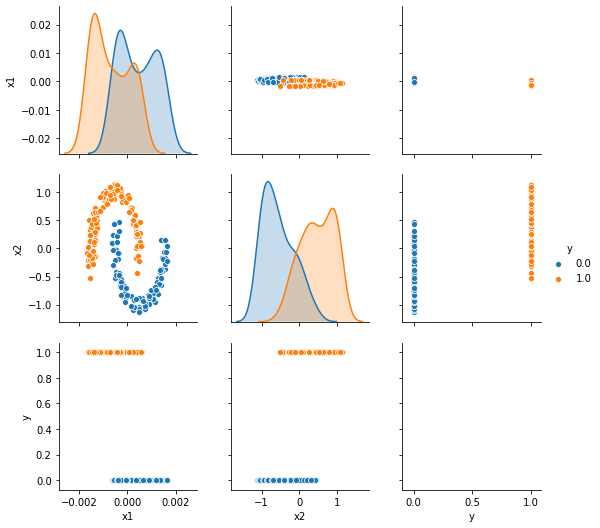

In [196]:
from pandas.plotting import scatter_matrix
import seaborn as sns

sns.pairplot(df, hue='y')

In [190]:
attr = df[attributes]
attr_mean = pd.DataFrame.mean(attr, axis=0)
attr_max = pd.DataFrame.max(attr, axis=0)
attr_min = pd.DataFrame.min(attr, axis=0)
attr_std = pd.DataFrame.std(attr, axis=0)

attr_norm = (attr - attr_mean) / attr_std

In [191]:
attr_norm['y'] = df['y']

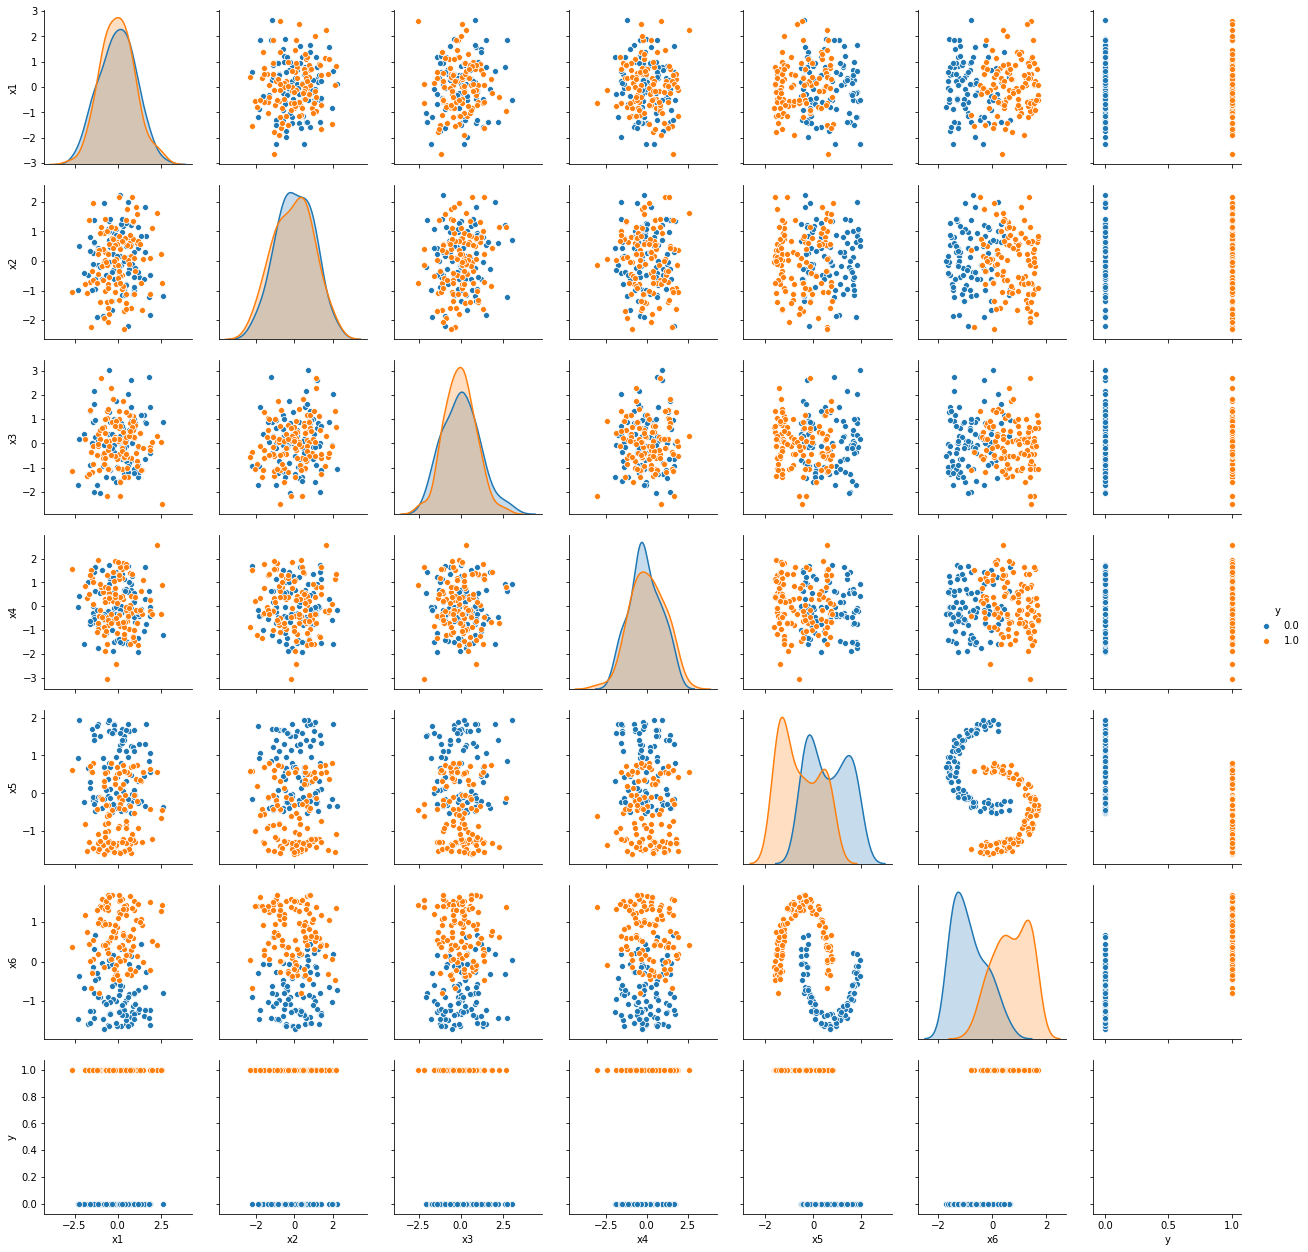

In [192]:
sns.pairplot(attr_norm, hue='y')

In [165]:
X_normalized = np.array(attr_norm[attributes])

In [166]:
cross_validate(X_normalized, Y)

([0.025, 0.0, 0.05, 0.05, 0.025], 0.03)

In [171]:
pd.DataFrame.var(attr)

x1    0.000109
x2    0.000113
x3    0.000091
x4    0.000095
x5    0.863844
x6    0.450556
dtype: float64